In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('breast_cancer.csv')

In [2]:
y_df = df['type']
x_df = df.drop('type',axis = 1)

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [4]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict,y_test)
score

0.9649122807017544

In [5]:
from sklearn.metrics import confusion_matrix
i = pd.DataFrame(confusion_matrix(y_test, y_predict),index = ['实际不患癌症','实际患癌症'],columns = ['预测不患癌症','预测患癌症'])
i

,预测不患癌症,预测患癌症
实际不患癌症,41,1
实际患癌症,3,69


In [6]:
print(model.coef_)
print(model.intercept_)

[[ 0.81073807  0.24112585 -0.25075215  0.02466689 -0.16549959 -0.19366835
  -0.4130848  -0.25344078 -0.29360926 -0.02749929 -0.06992006  1.11001415
  -0.12820215 -0.09262119 -0.01670032  0.10922456  0.03620604 -0.02640805
  -0.02558429  0.02411403  0.19084886 -0.43829246 -0.11538983 -0.01423011
  -0.33272721 -0.55485244 -1.13939981 -0.5364517  -0.72906115 -0.06375895]]
[26.92069181]


In [7]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba
a = pd.DataFrame(y_pred_proba,columns = ['分类为0的概率','分类为1的概率'])
a

,分类为0的概率,分类为1的概率
0,0.002308,0.997692
1,0.999985,0.000015
2,0.977477,0.022523
3,0.071567,0.928433
4,0.014864,0.985136
...,...,...
109,0.205603,0.794397
110,0.000099,0.999901
111,0.999999,0.000001
112,0.036481,0.963519


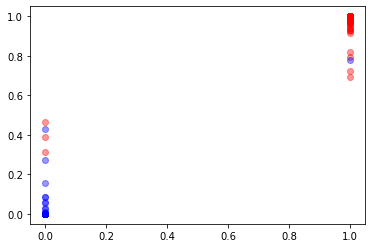

In [8]:
color1 = '#FF0000'
color2 = '#0000FF'
plt.scatter(y_predict[y_test>0.5],y_pred_proba[:,1][y_test>0.5],c=color1, alpha=0.4, label='正样本')
plt.scatter(y_predict[y_test<0.5],y_pred_proba[:,1][y_test<0.5],c=color2, alpha=0.4, label='负样本')
plt.show()